In [2]:
import json
from transformers import LlamaTokenizer

In [2]:
tokenizer = LlamaTokenizer.from_pretrained('/home/aiops/zhuty/tinyllama/models' , padding_side='left', truncation_side="left")
# tokenizer.pad_token = tokenizer.eos_token
tokenizer.add_bos_token = False
tokenizer.push_to_hub('tyzhu/tinyllama_common_tokenizer', token = json.load(open("/home/aiops/zhuty/hf_token.json")))

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Using pad_token, but it is not set yet.
Using pad_token, but it is not set yet.


CommitInfo(commit_url='https://huggingface.co/tyzhu/tinyllama_common_tokenizer/commit/66e213c0c35b81019b12e44fbbfb02d5517e16a9', commit_message='Upload tokenizer', commit_description='', oid='66e213c0c35b81019b12e44fbbfb02d5517e16a9', pr_url=None, pr_revision=None, pr_num=None)

In [4]:
from transformers import AutoTokenizer

In [5]:
tokenizer = AutoTokenizer.from_pretrained('tyzhu/tinyllama_common_tokenizer', )

OSError: tyzhu/tinyllama_common_tokenizer is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [23]:
tokenizer(["hello are ", 'great day'])

{'input_ids': [[22172, 526, 29871], [2107, 2462]], 'attention_mask': [[1, 1, 1], [1, 1]]}

In [95]:
def modify_tokenizer_dropout(dropout, tokenizer_path):
    json_file = f"{tokenizer_path}/tokenizer.json"
    data = json.load(open(json_file))
    assert data['model']['type']=='BPE'
    old_dropout = data['model']['dropout']
    print(f"old dropout: {old_dropout}, change to {dropout}")
    data['model']['dropout'] = dropout
    json.dump(data, open(json_file, 'w'))
    return data

In [117]:
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

texts = read_jsonl('/home/aiops/zhuty/ret_pretraining_data/cc/valid/chunk_0.jsonl')
texts = [text['text'] for text in texts]

In [157]:
texts = ["""
tyzhu/tinyllama_common_tokenizer is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>"""]
text = texts[0]

In [186]:
308/85

3.623529411764706

In [161]:
tokenizer_path = '/home/aiops/zhuty/test_tokenizer'

drop2tokenized_lengths = {}
for dropout in range(1, 101):
    dropout = dropout/100
    modify_tokenizer_dropout(dropout, tokenizer_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path, )
    # tokenized_lengths = []
#     for text in texts:
    curr_lengths = []
    for _ in range(100):
        tokenized = tokenizer([text], add_special_tokens=False)
        curr_lengths.append(len(tokenized['input_ids'][0]))
    drop2tokenized_lengths[dropout] = curr_lengths
    # tokenized_lengths.append(curr_lengths)
    # print(f"dropout: {dropout}, tokenized_lengths: {tokenized_lengths}")


old dropout: 1.0, change to 0.01
old dropout: 0.01, change to 0.02
old dropout: 0.02, change to 0.03
old dropout: 0.03, change to 0.04
old dropout: 0.04, change to 0.05
old dropout: 0.05, change to 0.06
old dropout: 0.06, change to 0.07
old dropout: 0.07, change to 0.08
old dropout: 0.08, change to 0.09
old dropout: 0.09, change to 0.1
old dropout: 0.1, change to 0.11
old dropout: 0.11, change to 0.12
old dropout: 0.12, change to 0.13
old dropout: 0.13, change to 0.14
old dropout: 0.14, change to 0.15
old dropout: 0.15, change to 0.16
old dropout: 0.16, change to 0.17
old dropout: 0.17, change to 0.18
old dropout: 0.18, change to 0.19
old dropout: 0.19, change to 0.2
old dropout: 0.2, change to 0.21
old dropout: 0.21, change to 0.22
old dropout: 0.22, change to 0.23
old dropout: 0.23, change to 0.24
old dropout: 0.24, change to 0.25
old dropout: 0.25, change to 0.26
old dropout: 0.26, change to 0.27
old dropout: 0.27, change to 0.28
old dropout: 0.28, change to 0.29
old dropout: 0.29, 

In [162]:
drop2tokenized_lengths[1]

[308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308,
 308]

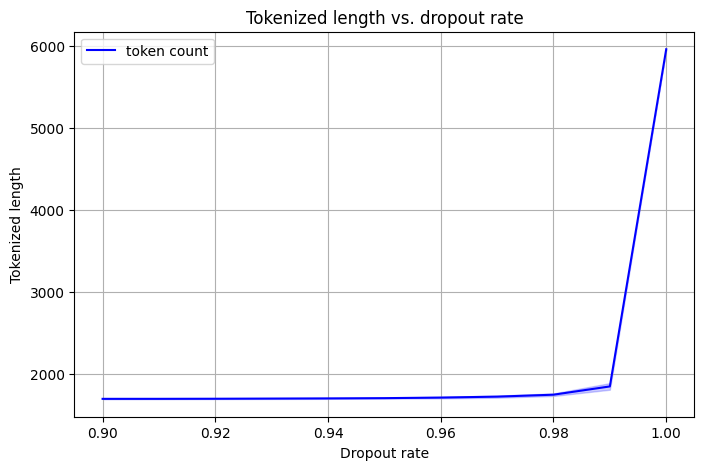

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# plot it as a line chart, with the dropout rate on the x-axis and the tokenized length on the y-axis, get the mean and std of the tokenized length
# dropouts = list(drop2tokenized_lengths.keys())
# mean_lengths = [sum(lengths)/len(lengths) for lengths in drop2tokenized_lengths.values()]
# std_lengths = [np.std(lengths) for lengths in drop2tokenized_lengths.values()]
lower_limit = 0.9

data = drop2tokenized_lengths


keys = list(data.keys())
keys = [key for key in keys if key >= lower_limit]

means = [np.mean((data[key])) for key in keys]
std_devs = [np.std((data[key])) for key in keys]

plt.figure(figsize=(8, 5))
plt.plot((keys), means, label='token count', color='blue')
plt.fill_between((keys), np.array(means) - np.array(std_devs), np.array(means) + np.array(std_devs), color='blue', alpha=0.2)
plt.legend()
plt.grid(True)
plt.xlabel('Dropout rate')
plt.ylabel('Tokenized length')
plt.title('Tokenized length vs. dropout rate')
plt.show()


In [168]:
import torch

In [171]:
(torch.tensor(tokenized['input_ids'][0] )==torch.tensor([29871,    13, 29873, 29891, 29920, 29882, 29884, 29914, 29873, 29875,
        29876, 29891, 29880, 29880, 29874, 29885, 29874, 29918, 29883, 29877,
        29885, 29885, 29877, 29876, 29918, 29873, 29877, 29895, 29872, 29876,
        29875, 29920, 29872, 29878, 29871, 29875, 29879, 29871, 29876, 29877,
        29873, 29871, 29874, 29871, 29880, 29877, 29883, 29874, 29880, 29871,
        29888, 29877, 29880, 29881, 29872, 29878, 29871, 29874, 29876, 29881,
        29871, 29875, 29879, 29871, 29876, 29877, 29873, 29871, 29874, 29871,
        29894, 29874, 29880, 29875, 29881, 29871, 29885, 29877, 29881, 29872,
        29880, 29871, 29875, 29881, 29872, 29876, 29873, 29875, 29888, 29875,
        29872, 29878, 29871, 29880, 29875, 29879, 29873, 29872, 29881, 29871,
        29877, 29876, 29871, 29915, 29882, 29873, 29873, 29886, 29879, 29901,
        29914, 29914, 29882, 29884, 29887, 29887, 29875, 29876, 29887, 29888,
        29874, 29883, 29872, 29889, 29883, 29877, 29914, 29885, 29877, 29881,
        29872, 29880, 29879, 29915,    13, 29902, 29888, 29871, 29873, 29882,
        29875, 29879, 29871, 29875, 29879, 29871, 29874, 29871, 29886, 29878,
        29875, 29894, 29874, 29873, 29872, 29871, 29878, 29872, 29886, 29877,
        29879, 29875, 29873, 29877, 29878, 29891, 29892, 29871, 29885, 29874,
        29895, 29872, 29871, 29879, 29884, 29878, 29872, 29871, 29873, 29877,
        29871, 29886, 29874, 29879, 29879, 29871, 29874, 29871, 29873, 29877,
        29895, 29872, 29876, 29871, 29882, 29874, 29894, 29875, 29876, 29887,
        29871, 29886, 29872, 29878, 29885, 29875, 29879, 29879, 29875, 29877,
        29876, 29871, 29873, 29877, 29871, 29873, 29882, 29875, 29879, 29871,
        29878, 29872, 29886, 29877, 29871, 29872, 29875, 29873, 29882, 29872,
        29878, 29871, 29890, 29891, 29871, 29880, 29877, 29887, 29887, 29875,
        29876, 29887, 29871, 29875, 29876, 29871, 29893, 29875, 29873, 29882,
        29871, 29952, 29882, 29884, 29887, 29887, 29875, 29876, 29887, 29888,
        29874, 29883, 29872, 29899, 29883, 29880, 29875, 29871, 29880, 29877,
        29887, 29875, 29876, 29952, 29871, 29877, 29878, 29871, 29890, 29891,
        29871, 29886, 29874, 29879, 29879, 29875, 29876, 29887, 29871, 29952,
        29873, 29877, 29895, 29872, 29876, 29922, 29966, 29891, 29877, 29884,
        29878, 29918, 29873, 29877, 29895, 29872, 29876, 29958,     ])).all()

tensor(True)

In [60]:
tokenizer(["hello are ", 'great day'])

{'input_ids': [[1, 22172, 526, 29871], [1, 2107, 2462]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1]]}

In [61]:
llama_tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-hf', )

In [62]:
llama_tokenizer(["hello are ", 'great day'])

{'input_ids': [[1, 22172, 526, 29871], [1, 2107, 2462]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1]]}

In [9]:
tokenizer.decode([ 591,  892,  472,  263, 6410,  363,  920,  304, 5649,  372])

'we were at a loss for how to explain it'

In [11]:
from datasets import load_dataset

In [12]:
dataset = load_dataset("json",
                           data_dir='/home/aiops/zhuty/ret_pretraining_data/book/valid',
                           split="train")

Resolving data files:   0%|          | 0/148 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [15]:
len(dataset[0:10]['text'])

10

In [58]:
tokenizer.pad_tok

In [48]:
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-hf', dropout=1) token= json.load(open("/home/aiops/zhuty/hf_token.json")), )

In [49]:
tokenized = tokenizer(["hello are we have a great day today or not? Yes we are but not sure if we are happy or not. I am happy you are happy whe are "])
print(len(tokenized['input_ids'][0]))

34


In [149]:
tokenizer.decode([  591,  892,  472,  263, 6410,  363,  920,  304, 5649,  372])

'we were at a loss for how to explain it'

In [156]:
import os
import sys
os.chdir('/home/aiops/zhuty/tinyllama')
sys.path.append('/home/aiops/zhuty/tinyllama')
from lit_gpt import Tokenizer

# token number

ModuleNotFoundError: No module named 'flash_attn'

In [172]:
import numpy as np

In [183]:
np.random.rand()

0.19975898205544862

In [188]:
augment_ratio =0.1
print((86357 * 8192 * (1-augment_ratio + augment_ratio * 3.6)   )//8192)

108809.0
